In [6]:
# Cell 1: Imports and paths
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path("/var/www/playground/AI-Code-Detection/data/raw/H-AIRosettaMP")
train_path = data_dir / "train.csv"
val_path   = data_dir / "validation.csv"
test_path  = data_dir / "test.csv"


In [7]:
# Cell 2: Load the splits
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)

print("Train shape:", df_train.shape)
print("Validation shape:", df_val.shape)
print("Test shape:", df_test.shape)


Train shape: (11126, 7)
Validation shape: (1237, 7)
Test shape: (1374, 7)


In [8]:
# Cell 3: Peek at the columns & a few rows
df_train.head(5)


,task_url,task_name,task_description,language_name,code,target,set
0,http://rosettacode.org/wiki/Program_name,Program name,The task is to programmatically obtain the nam...,Python,"import sys\n \nprint(""Program:"", sys.argv[0])",Ai_generated,Python_from_Go
1,http://rosettacode.org/wiki/Active_Directory/S...,Active Directory/Search for a user,Make sure you Connect to Active Directory\n,Python,import sys\nimport traceback\nfrom ldap3 impor...,Ai_generated,Python_from_Java
2,http://rosettacode.org/wiki/Command-line_argum...,Command-line arguments,Command-line arguments is part of Short Circui...,Python,import sys\nprogram_name = sys.argv[0]\nargume...,Human_written,Python_from_Ruby
3,http://rosettacode.org/wiki/Read_a_specific_li...,Read a specific line from a file,Some languages have special semantics for obta...,Python,"with open('xxx.txt') as f:\n for i, line in...",Human_written,Python_from_C++
4,http://rosettacode.org/wiki/Pi,Pi,\nCreate a program to continually calculate an...,Python,"def calcPi():\n q, r, t, k, n, l = 1, 0, 1,...",Human_written,Python_from_Rust


target
Human_written    5574
Ai_generated     5552
Name: count, dtype: int64


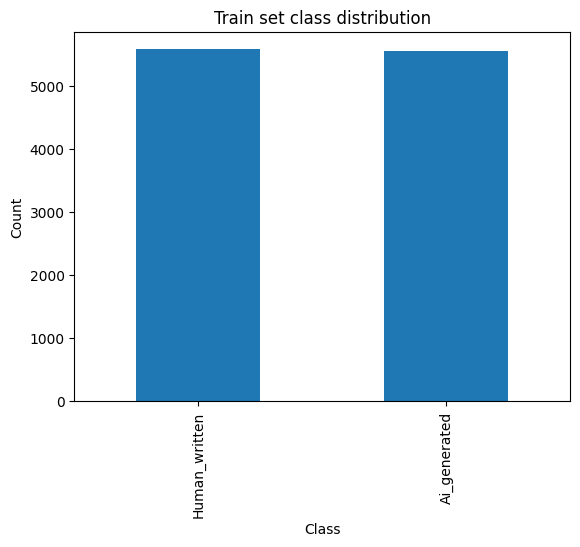

In [10]:
# Cell 4: Check class balance
# (assuming your label column is named 'target' with values 0/1 or 'Ai_generated'/'Human_written')
print(df_train['target'].value_counts())
df_train['target'].value_counts().plot(kind='bar')
plt.title("Train set class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


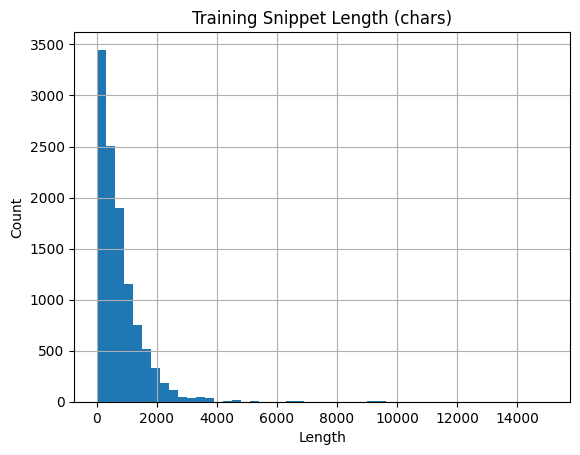

In [11]:
# Cell 5: Snippet length distribution
# First, define a length metric (e.g., number of characters or tokens)
df_train['char_len'] = df_train['code'].str.len()
df_train['char_len'].hist(bins=50)
plt.title("Training Snippet Length (chars)")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()


In [12]:
# Cell 6: Sample very short / very long snippets
print("Shortest snippet:\n", df_train.loc[df_train['char_len'].idxmin(), 'code'])
print("\nLongest snippet:\n", df_train.loc[df_train['char_len'].idxmax(), 'code'][:300], "…")


Shortest snippet:
 0/0

Longest snippet:
 """
 
Input and output are assumed to be in this form based on the talk
page for the task:
 
input_points = [
  [-1.0,  1.0,  1.0],
  [-1.0, -1.0,  1.0],
  [ 1.0, -1.0,  1.0],
  [ 1.0,  1.0,  1.0],
  [ 1.0, -1.0, -1.0],
  [ 1.0,  1.0, -1.0],
  [-1.0, -1.0, -1.0],
  [-1.0,  1.0, -1.0]
]
 
input_faces …
